In [1]:
import numpy as np

In [40]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [104]:
# set configurations for number of samples
sample_size = 100
nr_sample = 50
num_steps = 5

x_b = np.linspace(0,1,num_steps)

# cv config
test_size = 0.5
cv = 5
cv_config = [test_size, cv]

### Bounded distributions

In [105]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [106]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df.head(3)

,0,1,2,3,4,label
0,0.0,0.35,0.51,0.72,1.0,arcsine
1,0.0,0.34,0.51,0.73,1.0,arcsine
2,0.0,0.33,0.49,0.64,1.0,arcsine


In [107]:
x_5 = edf_df.iloc[0,:-1]

In [ ]:
x_10 = edf_df.iloc[0,:-1]

In [102]:
x_20 = edf_df.iloc[0,:-1]

In [83]:
x_100 = edf_df.iloc[0,:-1]

In [79]:
x_1000 = edf_df.iloc[0,:-1]

Text(0, 0.5, 'Cumulative Probability')

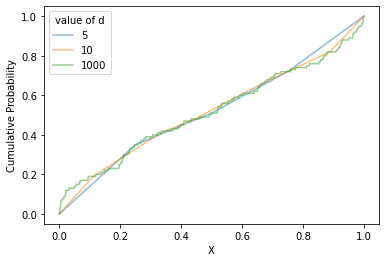

In [117]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,1,5), x_5, alpha = 0.5, label = '5')
plt.plot(np.linspace(0,1,10), x_10, alpha = 0.5, label = '10')
#plt.plot(np.linspace(0,1,20), x_20, alpha = 0.5)
#plt.plot(np.linspace(0,1,100), x_100, alpha = 0.5)
plt.plot(np.linspace(0,1,1000), x_1000, alpha = 0.5, label='1000')
plt.legend(title= 'value of d')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')

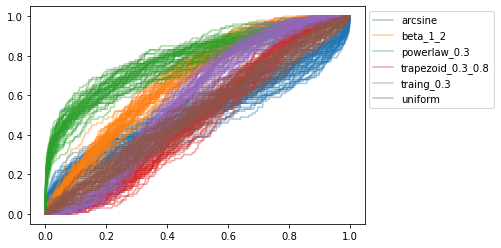

In [64]:
dem.get_edf_plot(edf_df, x_b)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

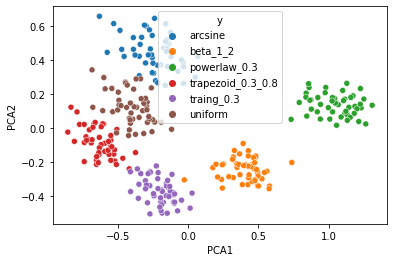

In [6]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2)
x_pca = pca.fit_transform(edf_df.iloc[:,:-1])

pca_res = pd.DataFrame(x_pca)
pca_res.columns=['PCA1','PCA2']
pca_res['y']=edf_df['label']

sns.scatterplot(data=pca_res,x='PCA1',y='PCA2',hue='y')

### SVM

In [6]:
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,51))

In [7]:
res_svm = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, cv_config, 'edf', 1)

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

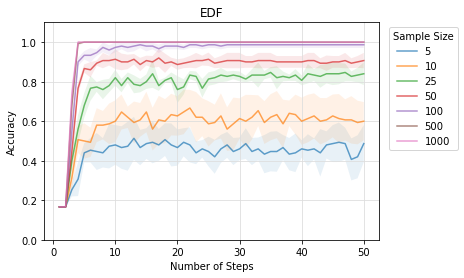

In [13]:
cm.plot_cv_numsteps_samplesize(res_svm)

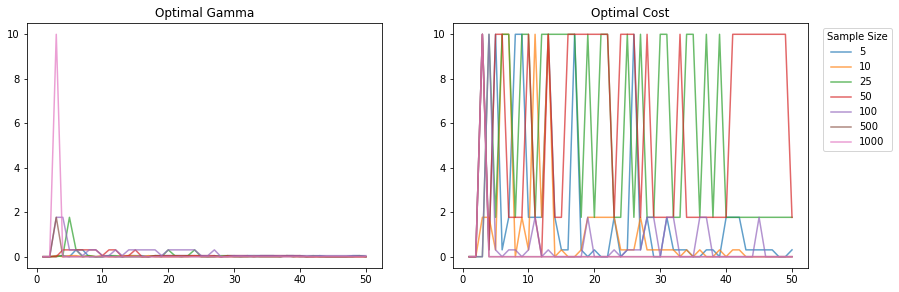

In [10]:
cm.plot_cv_h_params(res_svm)

### Logistic Regression

In [9]:
res_lr = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, cv_config, 'edf', 2)

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

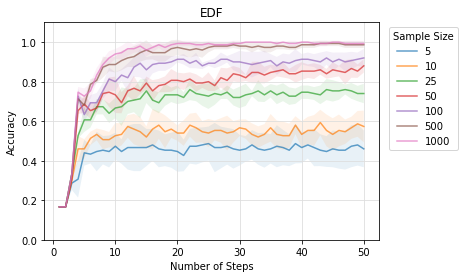

In [14]:
cm.plot_cv_numsteps_samplesize(res_lr)

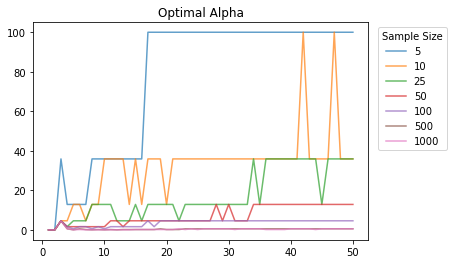

In [13]:
cm.plot_cv_h_params(res_lr)

### Heavytail distributions

In [16]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [17]:
perc_95 = np.percentile(heavytail_samples.iloc[:,:-1],95)
x_h = np.linspace(0,perc_95,num_steps)
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
0,0.0,0.23,0.48,0.64,0.73,0.76,0.82,0.83,0.88,0.88,...,0.94,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,cauchy
1,0.0,0.31,0.50,0.69,0.74,0.78,0.83,0.89,0.90,0.93,...,0.97,0.97,0.98,0.99,0.99,0.99,0.99,0.99,0.99,cauchy
2,0.0,0.24,0.49,0.57,0.65,0.68,0.69,0.74,0.79,0.81,...,0.92,0.92,0.92,0.92,0.92,0.93,0.93,0.94,0.95,cauchy


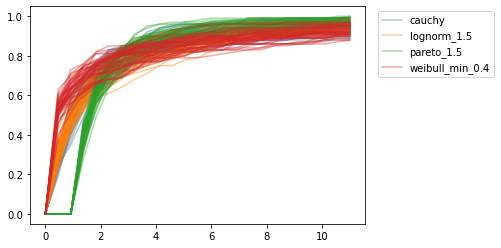

In [18]:
dem.get_edf_plot(edf_df, x_h)

### SVM

In [19]:
res_svm_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, cv_config, 'edf', 1, transform = True)

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

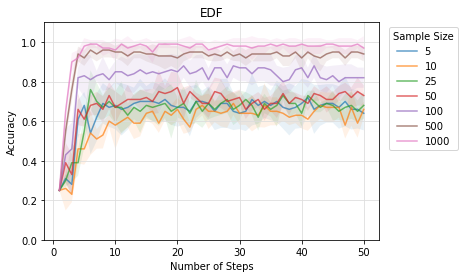

In [23]:
cm.plot_cv_numsteps_samplesize(res_svm_ht)

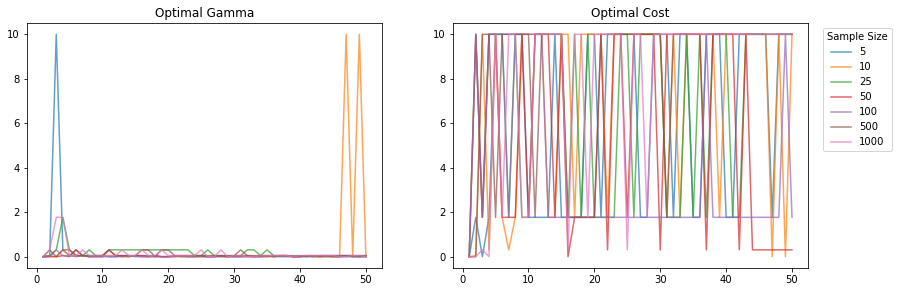

In [21]:
cm.plot_cv_h_params(res_svm_ht)

### Logistic Regression

In [21]:
res_lr_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, cv_config, 'edf', 2, transform = True)

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

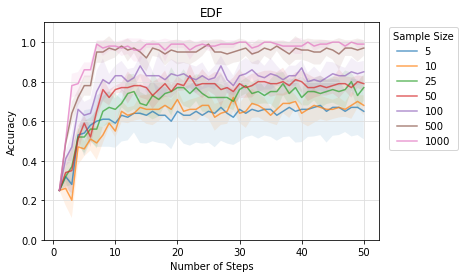

In [24]:
cm.plot_cv_numsteps_samplesize(res_lr_ht)

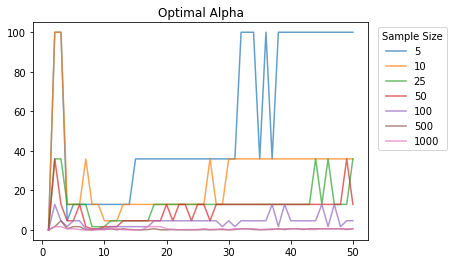

In [24]:
cm.plot_cv_h_params(res_lr_ht)